In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from IPython.display import Math, Latex # for latex equations
from IPython.core.display import Image # for displaying images
from scipy import stats
from scipy import optimize
import networkx as nx
import pandas as pd
from pyvis.network import Network
import collections
import itertools
import altair as alt


In [ ]:
T = hfsp.create_tissue("../data/exp_raw/sam.csv",edge_state = False)
g = T

temp_sch_1wC = np.array([168])
temp_sch_2wC = np.array([336])
temp_sch_4wC = np.array([672])
temp_sch_1wCW = np.array([20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,8])
temp_sch_2wCW = np.array([20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,16])
temp_sch_4wCW = np.array([20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,
                          20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,12])
temp_sch_2wC_8hW = np.array([336,8])
temp_sch_2wC_24hW = np.array([336,24])
temp_sch_2wC_72hW = np.array([336,72])

initial_state = np.zeros(len(g.nodes()), dtype = int)
# for i in range(len(g.nodes())):
#     c = np.random.choice([0,1], p = [0.99,0.01])
#     initial_state[i] = c
initial_state[80] = 1
initial_state[160] = 1
initial_state[240] = 1   
    
hfsp.update_spontaneous(g, jump_state = "default")

# Predicted from Rishi's data
p_decay0 = 0
p_decay1 = 0.0003
p_cold = 0.0002
p_warm = 0.01
p_cold60 = 0.002
p_cold80 = 0.001


In [ ]:
%%time

hfsp.update_spontaneous(g, jump_state = "default")
ensemble_data_20_1 = hfsp.ensemble(g, temp_sch_4wC, p_decay0, p_cold, p_warm, rule_code = [0,0.2], ensemble_size = 10, jump_state = "default")

hfsp.update_spontaneous(g, jump_state = "default")
ensemble_data_30_1 = hfsp.ensemble(g, temp_sch_4wC, p_decay0, p_cold, p_warm, rule_code = [0,0.3], ensemble_size = 10, jump_state = "default")

hfsp.update_spontaneous(g, jump_state = "default")
ensemble_data_35_1 = hfsp.ensemble(g, temp_sch_4wC, p_decay0, p_cold, p_warm, rule_code = [0,0.35], ensemble_size = 10, jump_state = "default")

hfsp.update_spontaneous(g, jump_state = "default")
ensemble_data_40_1 = hfsp.ensemble(g, temp_sch_4wC, p_decay0, p_cold, p_warm, rule_code = [0,0.40], ensemble_size = 10, jump_state = "default")

hfsp.update_spontaneous(g, jump_state = "default")
ensemble_data_45_1 = hfsp.ensemble(g, temp_sch_4wC, p_decay0, p_cold, p_warm, rule_code = [0,0.45], ensemble_size = 10, jump_state = "default")

hfsp.update_spontaneous(g, jump_state = "default")
ensemble_data_50_1 = hfsp.ensemble(g, temp_sch_4wC, p_decay0, p_cold, p_warm, rule_code = [0,0.50], ensemble_size = 10, jump_state = "default")

hfsp.update_spontaneous(g, jump_state = "default")
ensemble_data_55_1 = hfsp.ensemble(g, temp_sch_4wC, p_decay0, p_cold, p_warm, rule_code = [0,0.55], ensemble_size = 10, jump_state = "default")

hfsp.update_spontaneous(g, jump_state = "default")
ensemble_data_60_1 = hfsp.ensemble(g, temp_sch_4wC, p_decay0, p_cold, p_warm, rule_code = [0,0.6], ensemble_size = 10, jump_state = "default")

hfsp.update_spontaneous(g, jump_state = "default")
ensemble_data_70_1 = hfsp.ensemble(g, temp_sch_4wC, p_decay0, p_cold, p_warm, rule_code = [0,0.7], ensemble_size = 10, jump_state = "default")

hfsp.update_spontaneous(g, jump_state = "default")
ensemble_data_80_1 = hfsp.ensemble(g, temp_sch_4wC, p_decay0, p_cold, p_warm, rule_code = [0,0.8], ensemble_size = 10, jump_state = "default")

In [ ]:
hfsp.percentGA_plt(ensemble_data_20_1, 'red') +\
hfsp.percentGA_plt(ensemble_data_30_1, 'red') +\
hfsp.percentGA_plt(ensemble_data_35_1, 'magenta') +\
hfsp.percentGA_plt(ensemble_data_40_1, 'magenta') +\
hfsp.percentGA_plt(ensemble_data_45_1, 'magenta') +\
hfsp.percentGA_plt(ensemble_data_50_1, 'blue') +\
hfsp.percentGA_plt(ensemble_data_55_1, 'blue') +\
hfsp.percentGA_plt(ensemble_data_60_1, 'blue') +\
hfsp.percentGA_plt(ensemble_data_70_1, 'blue') +\
hfsp.percentGA_plt(ensemble_data_80_1, 'blue')


In [ ]:
hfsp.percentGA_plt(ensemble_data40, 'green') + hfsp.percentGA_plt(ensemble_data60, 'blue') + hfsp.percentGA_plt(ensemble_data80, 'red') 

In [ ]:
ensemble_data60

In [ ]:
hfsp.update_spontaneous(g, jump_state = "default")
ensemble_data3 = hfsp.ensemble(g, temp_sch_4wC, p_decay0, p_cold, p_warm, rule_code = 1, ensemble_size = 20)
hfsp.update_spontaneous(g, jump_state = "default")
ensemble_data4 = hfsp.ensemble(g, temp_sch_4wC, p_decay1, p_cold, p_warm, rule_code = 1, ensemble_size = 20)
hfsp.percentFT1_plt(ensemble_data3, 'green') + hfsp.percentFT1_plt(ensemble_data4, 'red')


In [ ]:
# With and without Majority rule for constant cold (4 weeks)


hfsp.update_spontaneous(g, jump_state = "default")
ensemble_data1 = hfsp.ensemble(g, temp_sch_4wC, p_decay1, p_cold, p_warm, rule_code = 0, ensemble_size = 20)
hfsp.update_spontaneous(g, jump_state = "default")
ensemble_data2 = hfsp.ensemble(g, temp_sch_4wC, p_decay1, p_cold, p_warm, rule_code = 1, ensemble_size = 20)
hfsp.percentFT1_plt(ensemble_data1, 'black') + hfsp.percentFT1_plt(ensemble_data2, 'blue')

# Green = with MR
# Black = No MR 

In [ ]:
# With and without Majority rule for alternating cold/warm (total = 2 weeks)


hfsp.update_spontaneous(g, jump_state = "default")
ensemble_data1 = hfsp.ensemble(g, temp_sch_2wCW, p_cold, p_warm, rule_code = 0, ensemble_size = 20)
hfsp.update_spontaneous(g, jump_state = "default")
ensemble_data2 = hfsp.ensemble(g, temp_sch_2wCW, p_cold, p_warm, rule_code = 1, ensemble_size = 20)
hfsp.percentFT1_plt(ensemble_data1, 'black') + hfsp.percentFT1_plt(ensemble_data2, 'green')

# Green = with MR
# Black = No MR 

In [ ]:
# For the predicted p_cold and p_warm, the robustness (SD # of hours for the tissue to reach 50% FT1 expression)

n = ['Continuous Cold', 'discontinuous cold']
s = [2.2, 3.4]
line = plt.bar(n,s)
plt.xlabel('p_cold = 0.0003, p_warm = 0.03)')
plt.ylabel("SD # of hours at 10% FT1 exp")
plt.title('robustness analysis')
for i in range(len(s)):
    plt.annotate(str(s[i]), xy=(n[i],s[i]), ha='center', va='bottom')

plt.show()

# at 10% FT1 exp; continuous = 2.2, discont = 3.4)  

In [ ]:
hfsp.update_spontaneous(g, jump_state = "default")
temp_4wCW = np.array([20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4])
ensemble_data3 = hfsp.ensemble(g, temp, p_cold, p_warm, rule_code = 1, ensemble_size = 20)
hfsp.percentFT1_plt(ensemble_data3, 'green')

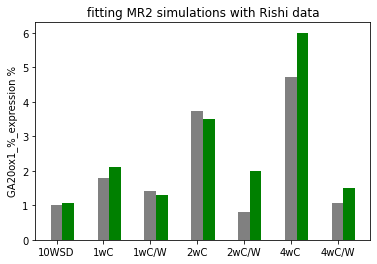

In [9]:

labels = ['10WSD', '1wC', '1wC/W', '2wC', '2wC/W', '4wC', '4wC/W']
Rishi_data_GA = [1.02, 1.79,1.4,3.73, 0.8, 4.73,1.08 ]
Swanand_simulation_MR2 = [1.06, 2.1, 1.3, 3.5, 2, 6, 1.5]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
x_axis = np.arange(len(labels))

# Multi bar Chart
plt.bar(x_axis, Rishi_data_GA, width=0.25, label = 'Rishi_exp_GA20Ox', color = 'grey')
plt.bar(x_axis + 0.25, Swanand_simulation_MR2 ,  width=0.25, label = 'Swanand simulation /w MR', color = 'green')
# plt.bar(x_axis +0.4, Swanand_simulation_noMR ,yerr = err_sim_noMR,  width=0.2, label = 'Swanand simulation with no MR', color = 'lightgreen')
# plt.bar(x_axis, Rishi_data_GA,  width=0.5, color = 'grey')
# Xticks
plt.ylabel("GA20ox1_%_expression %")
plt.title('fitting MR2 simulations with Rishi data')
plt.xticks(x_axis, labels)

# Add legend

# plt.legend(loc='upper left')

# Display
plt.savefig("1")
plt.show()


In [ ]:
# def SD_time_at10(df):
#     time_at10 = []
#     for i in range(len(df.iloc[0,:])-5):
#         for j in range(len(df)):
#             if df.iloc[:,i+1][j] > 10:
#                 time_at10.append(df['time'][j])
#                 break
#     return np.std(np.array(time_at10))